# `Data Upload & Pre-processing`

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [63]:
# Upload Train & Test datasets
train = pd.read_excel('data/Train.xlsx')
test = pd.read_excel('data/Test.xlsx')

train.head()

,timestamp,Температура,Количество Осадков,Количество Выпадения снега,Общая облачность,Высокая облачность,Средняя облачность,Низкая облачность,Давление,Скорость ветра,Направления ветра,Порывы ветра
0,2019-01-01 00:00:00,5.150528,0.0,0.0,100.0,0,0,100,1035.4,1.392839,291.03750,1.9
1,2019-01-01 01:00:00,5.050529,0.0,0.0,100.0,3,0,100,1035.6,1.300000,292.61987,1.9
2,2019-01-01 02:00:00,4.900528,0.0,0.0,100.0,7,0,100,1035.0,1.303840,302.47120,2.0
3,2019-01-01 03:00:00,4.810529,0.0,0.0,100.0,10,0,100,1035.3,1.341641,296.56506,2.2
4,2019-01-01 04:00:00,4.730528,0.0,0.0,100.0,15,0,100,1035.1,1.486607,289.65380,1.5


In [3]:
# Datatable Analysis
train.describe()

,Температура,Количество Осадков,Количество Выпадения снега,Общая облачность,Высокая облачность,Средняя облачность,Низкая облачность,Давление,Скорость ветра,Направления ветра,Порывы ветра
count,38688.000000,38688.000000,38688.000000,38688.000000,38688.000000,38688.000000,38688.000000,38688.000000,38688.000000,38688.000000,38688.000000
mean,12.483913,0.054389,0.002884,46.770619,18.777657,29.436208,35.596645,1017.475879,3.196870,199.059919,4.982589
std,7.791689,0.335681,0.049840,45.594337,33.126097,42.024090,45.118007,8.693380,2.365800,94.481486,3.227840
min,-8.149471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,973.700000,0.000000,0.881393,0.000000
25%,6.450529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1012.900000,1.552418,115.641010,2.700000
50%,12.050529,0.000000,0.000000,27.300001,0.000000,0.000000,1.000000,1017.800000,2.529822,212.779570,4.300000
75%,18.010529,0.000000,0.000000,100.000000,20.000000,73.000000,100.000000,1022.400000,4.201190,274.513980,6.400000
max,36.330530,19.800000,2.800000,100.000000,100.000000,100.000000,100.000000,1043.200000,19.828514,360.000000,32.300000


In [4]:
# Check for missing values + data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38688 entries, 0 to 38687
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   38688 non-null  datetime64[ns]
 1   Температура                 38688 non-null  float64       
 2   Количество Осадков          38688 non-null  float64       
 3   Количество Выпадения снега  38688 non-null  float64       
 4   Общая облачность            38688 non-null  float64       
 5   Высокая облачность          38688 non-null  int64         
 6   Средняя облачность          38688 non-null  int64         
 7   Низкая облачность           38688 non-null  int64         
 8   Давление                    38688 non-null  float64       
 9   Скорость ветра              38688 non-null  float64       
 10  Направления ветра           38688 non-null  float64       
 11  Порывы ветра                38688 non-null  float64   

In [64]:
# Data Preprocessing
def data_preprocessing(df):
  df['timestamp'] = pd.to_datetime(df['timestamp'])
  cols = {
      'Температура': 'temperature',
      'Количество Осадков': 'rainfall',
      'Количество Выпадения снега': 'snowfall',
      'Общая облачность': 'total_cloud',
      'Высокая облачность': 'high_cloud',
      'Средняя облачность': 'avg_cloud',
      'Низкая облачность': 'low_cloud',
      'Давление': 'pressure',
      'Скорость ветра': 'wind_speed',
      'Направления ветра': 'wind_direction',
      'Порывы ветра': 'turbo_wind'
  }
  df.rename(columns=cols, inplace=True)
  return df

train = data_preprocessing(train)

In [6]:
train.tail()

,timestamp,temperature,rainfall,snowfall,total_cloud,high_cloud,avg_cloud,low_cloud,pressure,wind_speed,wind_direction,turbo_wind
38683,2023-05-31 19:00:00,24.590528,0.0,0.0,10.0,0,10,10,1016.3,4.219004,95.440320,4.5
38684,2023-05-31 20:00:00,24.080528,0.0,0.0,0.0,0,0,0,1016.8,3.201562,91.789900,3.9
38685,2023-05-31 21:00:00,22.910528,0.0,0.0,0.0,0,0,0,1017.1,2.789265,75.465546,3.8
38686,2023-05-31 22:00:00,21.030529,0.0,0.0,0.0,0,0,0,1017.3,2.692582,74.931500,5.8
38687,2023-05-31 23:00:00,18.860529,0.0,0.0,0.0,0,0,0,1017.7,2.109502,84.559670,5.5


# `Exploratory Data Analysis`

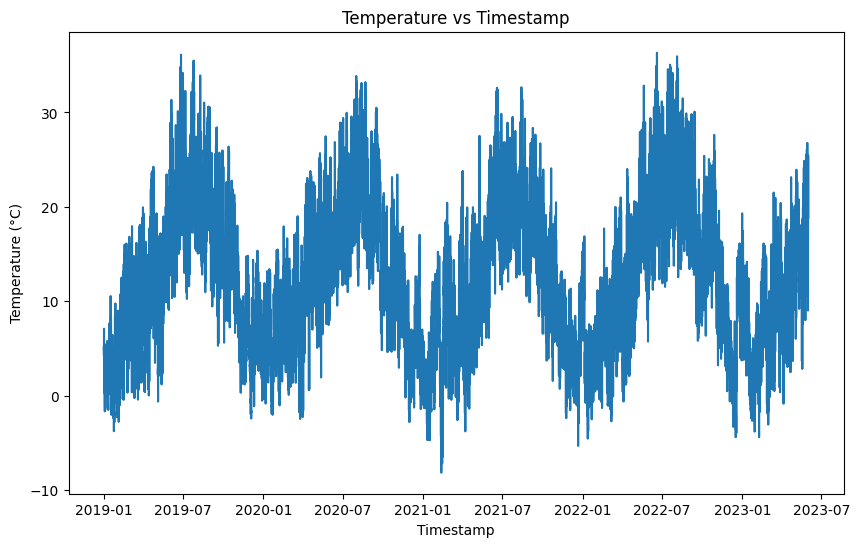

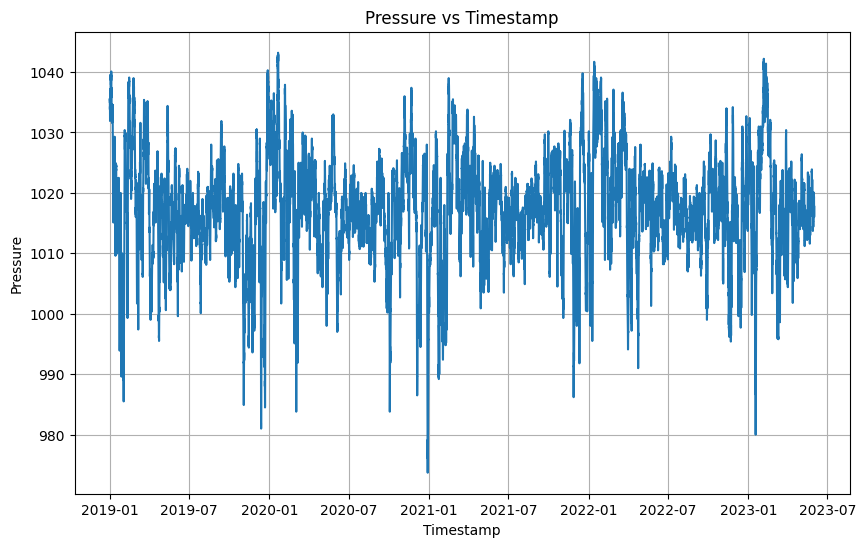

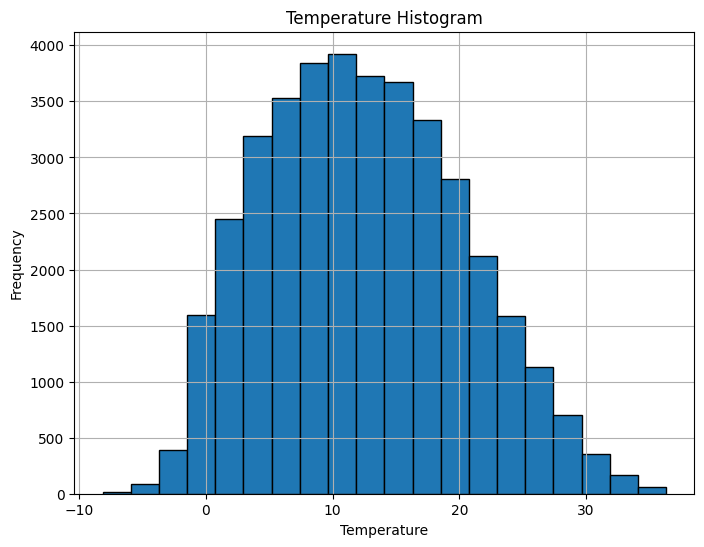

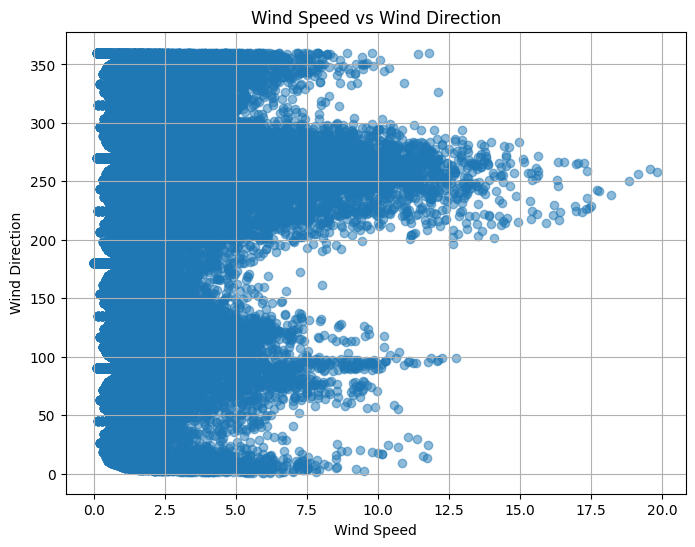

In [5]:
# Exploratory Data Analysis

# Temperature vs Timestamp
plt.figure(figsize=(10, 6))
plt.plot(train['timestamp'], train['temperature'])
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Timestamp')

# Plotting Pressure vs Timestamp
plt.figure(figsize=(10, 6))
plt.plot(train['timestamp'], train['pressure'])
plt.xlabel('Timestamp')
plt.ylabel('Pressure')
plt.title('Pressure vs Timestamp')
plt.grid(True)
plt.show()

# Histogram of Temperature
plt.figure(figsize=(8, 6))
plt.hist(train['temperature'], bins=20, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Histogram')
plt.grid(True)
plt.show()

# Scatter plot of Wind speed vs Wind direction
plt.figure(figsize=(8, 6))
plt.scatter(train['wind_speed'], train['wind_direction'], alpha=0.5)
plt.xlabel('Wind Speed')
plt.ylabel('Wind Direction')
plt.title('Wind Speed vs Wind Direction')
plt.grid(True)
plt.show()



<ipython-input-8-86ed8ce81e6f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


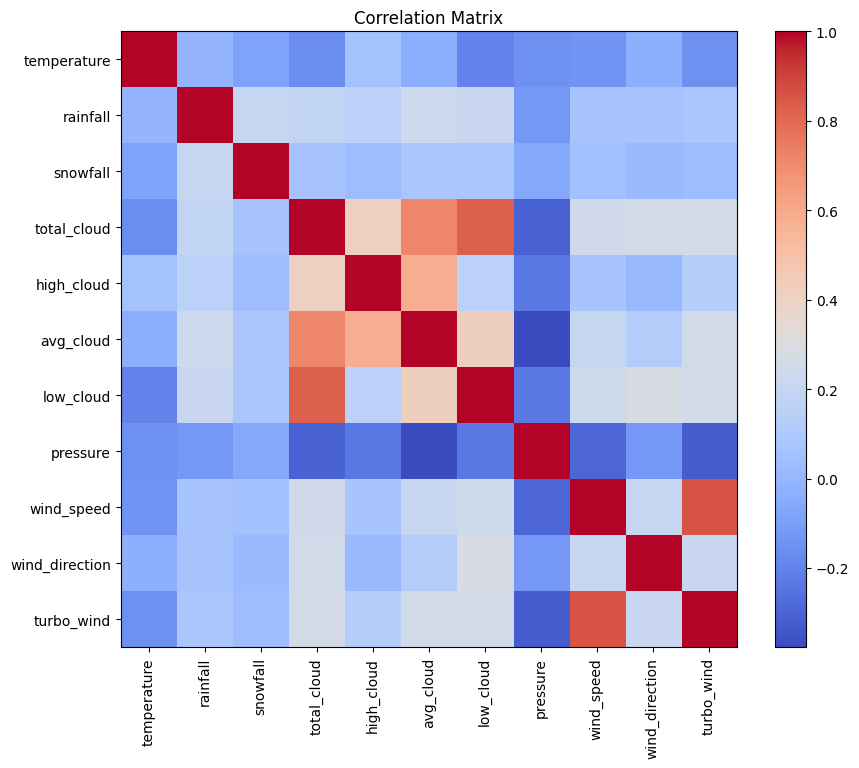

In [8]:
# Correlation Matrix
correlation_matrix = train.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

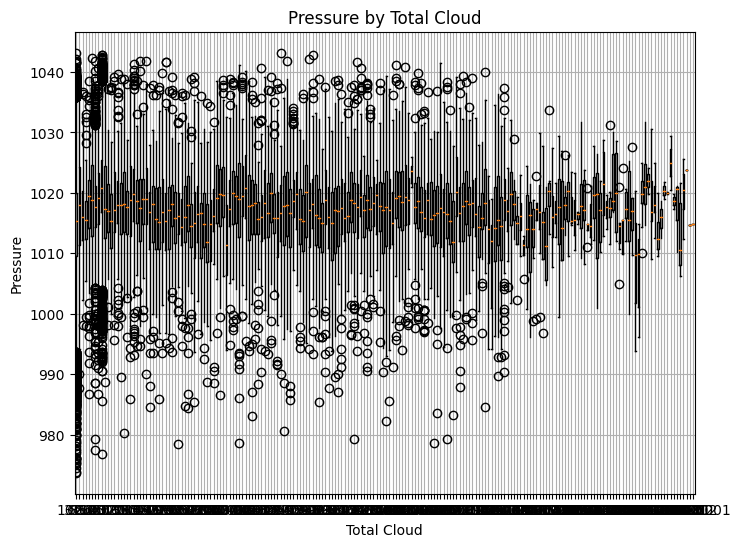

In [9]:
# Box plot Pressure - Total Cloud
plt.figure(figsize=(8, 6))
plt.boxplot([train[train['total_cloud'] == cat]['pressure'] for cat in train['total_cloud'].unique()])
plt.xlabel('Total Cloud')
plt.ylabel('Pressure')
plt.title('Pressure by Total Cloud')
plt.xticks(range(1, len(train['total_cloud'].unique()) + 1), train['total_cloud'].unique())
plt.grid(True)
plt.show()

# `Model Training & Testing using Time Series ML Algorithm`

In [6]:
# Install Facebook Neural Prophet
!pip uninstall jupyter
!pip install jupyter
!pip install neuralprophet[lite]

Found existing installation: jupyter 1.0.0
Uninstalling jupyter-1.0.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/jupyter-1.0.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/jupyter.py
Proceed (Y/n)? Y\
Your response ('y\\') was not one of the expected responses: y, n, 
Proceed (Y/n)? Y
  Successfully uninstalled jupyter-1.0.0
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)


In [8]:
# Import Facebook Neural Prophet
import neuralprophet as nn

# Disable logging messages unless there is an error
nn.set_log_level("ERROR")

In [65]:
# Preparing training data
df = train[['timestamp', 'temperature']]
df.columns = ['ds', 'y']

In [60]:
# Model Initialization & fitting to data
model = nn.NeuralProphet()
model.fit(df)

Finding best initial lr:   0%|          | 0/264 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,40.500088,48.971809,0.597853,0.0,0
1,18.162142,22.478678,0.174509,0.0,1
2,4.205362,5.154760,0.008562,0.0,2
3,3.328014,4.072573,0.005162,0.0,3
4,3.203704,3.924889,0.004889,0.0,4
...,...,...,...,...,...
68,3.065215,3.758573,0.004539,0.0,68
69,3.060670,3.753079,0.004523,0.0,69
70,3.058403,3.748811,0.004512,0.0,70
71,3.055158,3.744549,0.004504,0.0,71


In [82]:
# Save the model
with open('swk_forecast_model.pkl', 'wb') as file:
  pickle.dump(model, file)

In [ ]:
# Load the model
with open('swk_forecast_model.pkl', 'rb') as f:
  model = pickle.load(f)

In [66]:
# Prepare test dataset
test = data_preprocessing(test)
test = test[['timestamp', 'temperature']]
test.columns = ['ds', 'y']
test.head()

,ds,y
0,2023-06-01 00:00:00,16.900530
1,2023-06-01 01:00:00,15.880529
2,2023-06-01 02:00:00,15.230529
3,2023-06-01 03:00:00,14.450529
4,2023-06-01 04:00:00,13.650529


In [67]:
# Make some predictions
future = model.make_future_dataframe(df, periods=720)
forecast = model.predict(future)
forecast.head()

Predicting: 605it [00:00, ?it/s]

,ds,y,yhat1,trend,season_yearly,season_weekly,season_daily
0,2023-06-01 00:00:00,None,16.923479,13.302101,4.720837,0.148978,-1.248438
1,2023-06-01 01:00:00,None,16.395828,13.302008,4.729137,0.150737,-1.786055
2,2023-06-01 02:00:00,None,15.992760,13.301914,4.737445,0.152154,-2.198752
3,2023-06-01 03:00:00,None,15.652613,13.301821,4.745757,0.153302,-2.548265
4,2023-06-01 04:00:00,None,15.298878,13.301729,4.754072,0.154253,-2.911175


In [68]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ds             720 non-null    datetime64[ns]
 1   y              0 non-null      object        
 2   yhat1          720 non-null    float64       
 3   trend          720 non-null    float64       
 4   season_yearly  720 non-null    float64       
 5   season_weekly  720 non-null    float64       
 6   season_daily   720 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 39.5+ KB


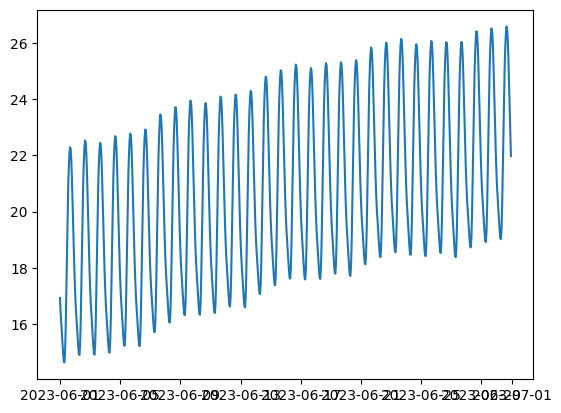

In [76]:
# Plotting Timestamp vs Predicted Values
plt.plot(forecast['ds'], forecast['yhat1'])
plt.show()

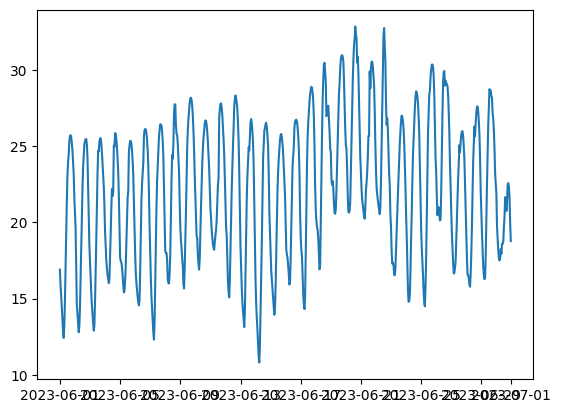

In [70]:
# Plotting Timestamp vs Actual Values
plt.plot(test['ds'], test['y'])
plt.show()

In [71]:
# Preparing results dataset
test['yhat1'] = forecast['yhat1']

In [72]:
cols = {
    'ds': 'datetime',
    'y': 'actual_temperature',
    'yhat1': 'predicted_temperature'
}
test.rename(columns=cols, inplace=True)

In [73]:
test.head()

,datetime,actual_temperature,predicted_temperature
0,2023-06-01 00:00:00,16.900530,16.923479
1,2023-06-01 01:00:00,15.880529,16.395828
2,2023-06-01 02:00:00,15.230529,15.992760
3,2023-06-01 03:00:00,14.450529,15.652613
4,2023-06-01 04:00:00,13.650529,15.298878


In [75]:
# Accuracy Evaluation
from sklearn import metrics

# Calculate the accuracy measures
mae = metrics.mean_absolute_error(test["actual_temperature"], test["predicted_temperature"])
mse = metrics.mean_squared_error(test["actual_temperature"], test["predicted_temperature"])
rmse = np.sqrt(mse)
r2 = metrics.r2_score(test["actual_temperature"], test["predicted_temperature"])
accuracy = (1 - (mae / test['actual_temperature'])
).mean()
# Print the accuracy measures
print("Mean absolute error:", mae)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R-squared:", r2)
print("Accuracy:", accuracy)



Mean absolute error: 2.5428408186613294
Mean squared error: 9.15893259791455
Root mean squared error: 3.0263728451587966
R-squared: 0.5842387748523712
Accuracy: 0.8797993290959416


*  `MAE` is `2.5428408186613294`, which means that the model's predictions are on average 2.5428408186613294 units away from the actual values;
* `MSE` is `9.15893259791455`, which means that the squared errors between the predicted and actual values average 9.15893259791455 units.
* `RMSE` is `3.0263728451587966`, which means that the average distance between the predicted and actual values is 3.0263728451587966 units.
* `R-squared` value is `0.5842387748523712`, which means that the model's predictions fit the actual values `58.42%` of the time.
* `Accuracy` formulas is `accuracy = 1 - (MAE / actual_range)`.

In [77]:
# Final submission.csv download
test.to_csv('submission.csv', index=False)

In [81]:
# Results data save: results.txt
with open('results.txt', 'w+') as f:
  f.write('''[Neural Prophet] Results:
  * Mean absolute error: 2.5428408186613294
  * Mean squared error: 9.15893259791455
  * Root mean squared error: 3.0263728451587966
  * R-squared: 0.5842387748523712
  * Accuracy: 0.8797993290959416''')